In [41]:
#Import packages of interest
import csv
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
#from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_columns=300
pd.options.display.max_rows=100
# Needed to scale PCA
from sklearn.preprocessing import StandardScaler

In [42]:
## TODO WRITE CODE AS CLASS IN SKLEARN STYLE WITH FIT/TRANSFORM

In [4]:
model1_psn3_10min = pd.read_csv('../../../data/anonymized/Model1/psn_3_twoyr_10min.csv')
# model1_psn3_10min = model1_psn3_10min.set_index('TIMESTAMP')

In [5]:
model1_psn3_10min['NPT'].head()

0    0.853322
1    0.890641
2    0.917015
3    0.884707
4    0.898949
Name: NPT, dtype: float64

In [6]:
plt.figure(figsize=(12,6))
test = model1_psn3_10min.iloc[:1000]
plt.plot(test['NPT'])

In [7]:
## test if data is already sorted by timestamp
##np.all(model1_psn3_10min.sort_values(by='TIMESTAMP').index == model1_psn3_10min.index)

In [8]:
# df.loc[260:270]

In [9]:
test = model1_psn3_10min.iloc[:1000]
df = test[['NPT','TIMESTAMP']]
df2 = pd.DataFrame(index = df.index.values[1:],columns = df.columns.values)


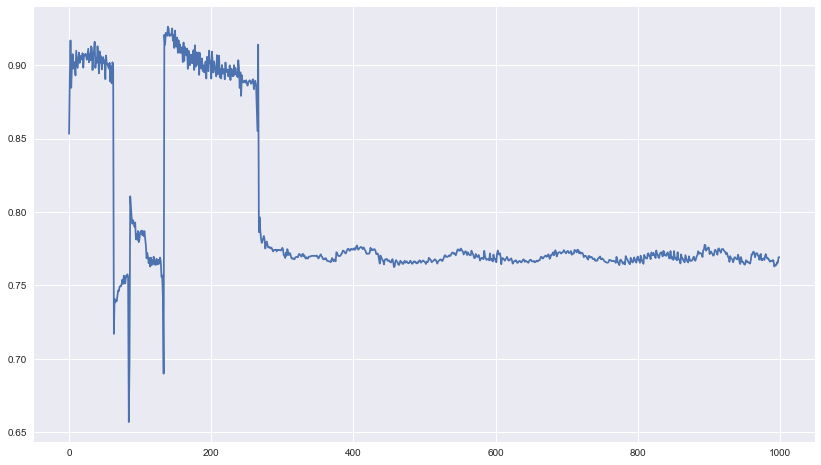

In [40]:
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(test['NPT'])

In [10]:
def drop_recent_nans(fulltime, timestampcol,powercol):
    todrop=[]
    idxs = fulltime.index.values
    for i,j in enumerate(fulltime.index.values):
        if np.isnan(fulltime.loc[idxs[i]][powercol]):
            if np.isnan(fulltime.loc[idxs[i+1]][powercol])==False:
                if (fulltime.loc[idxs[i+1]][timestampcol] - fulltime.loc[idxs[i]][timestampcol])<pd.Timedelta('13 minutes'):
                    todrop.append(idxs[i])
            elif np.isnan(fulltime.loc[idxs[i-1]][powercol])==False:         
                if (fulltime.loc[idxs[i]][timestampcol] - fulltime.loc[idxs[i-1]][timestampcol])<pd.Timedelta('13 minutes'):
                    todrop.append(idxs[i])
    dropped = fulltime.drop(todrop)
    return (dropped)

In [11]:
def timejoiner(df,timestampcol,powercol):
    aa = pd.DataFrame()
    aa[timestampcol]= pd.date_range(test.iloc[0]['timestamp'],test.iloc[-1][timestampcol],freq=pd.Timedelta('10minutes'))
    aa[powercol]=np.nan
    aa.merge(df,how='left')
    df[timestampcol] = pd.to_datetime(df[timestampcol])
    fulltime = aa.append(df)#.sort_values(by='TIMESTAMP')
    fulltime = fulltime.sort_values(by=timestampcol).reset_index().drop('index',axis=1)

#     while np.any(np.isnan(fulltime[powercol])):
    fulltime = drop_recent_nans(fulltime,timestampcol,powercol)
    
    fulltime = fulltime.set_index(timestampcol)
    return (fulltime)
# aa.merge(df)

In [12]:
testfulldf = timejoiner(test,'TIMESTAMP','NPT')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
# testfulldf.head(100)

In [198]:
df = timejoiner(df,'TIMESTAMP','NPT')

/Users/Garrett/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [200]:
df.head(100)

,NPT
TIMESTAMP,
2015-12-16 10:10:00.000001024,0.853322
2015-12-16 10:19:59.999995648,0.890641
2015-12-16 10:30:00.000000000,0.917015
2015-12-16 10:40:00.000004352,0.884707
2015-12-16 10:49:59.999998976,0.898949
2015-12-16 11:00:00.000003328,0.907652
2015-12-16 11:09:59.999997696,0.897762
2015-12-16 11:20:00.000002304,0.902378
2015-12-16 11:29:59.999996672,0.899872


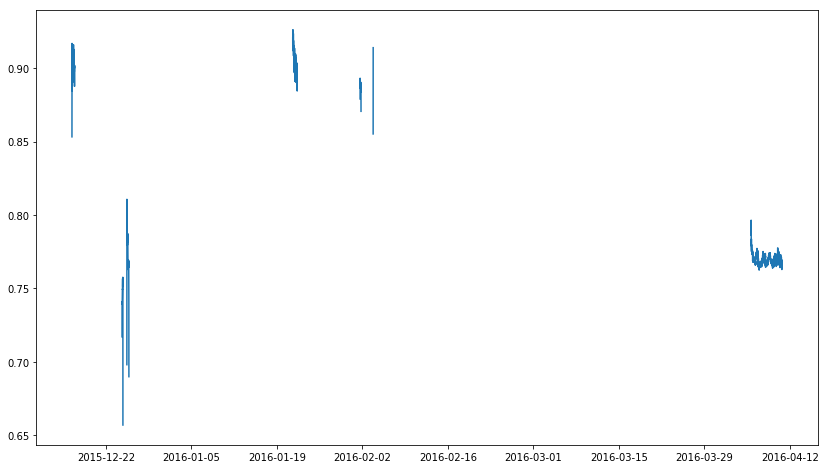

In [201]:
plt.figure(figsize=(14,8))
plt.plot(df['NPT'])

In [21]:
shifted = pd.Series(np.subtract(df['NPT'].values[1:],df['NPT'].values[:-1]),index=df.index.values[1:])
tomap = np.zeros(len(df2),dtype=int)  


In [34]:
maps = shifted[abs(shifted)>0.1]
pos = shifted[shifted>0.1]
negs = shifted[shifted<-0.1]

In [35]:
maps

63    -0.183561
86     0.112748
134    0.231034
267   -0.127781
dtype: float64

In [36]:
negs

63    -0.183561
267   -0.127781
dtype: float64

In [ ]:
def find_power_step (df,powercol,jump = 0.2):
    df = df[[powercol,'timestamp']]

    
    df = df.where((pd.notnull(df)),np.nan) ## replaces nulls with nans for math stuffs.
    df2 = pd.DataFrame(index = df.index.values[1:],columns = df.columns.values)
    df2['timestamp'] = df['timestamp'].values[1:]
    ## np.subtract subtracts the frst item from the second item so this starts from 1th item
    shifted = pd.Series(np.subtract(df[powercol].values[1:],df[powercol].values[:-1]),index=df.index.values[1:])

    ## take all values and subtract from previous values. if unchanging, then result will be 0
    ## create numpy array of all False

    tomap = np.zeros(len(df2),dtype=int)  
    
    ## todo: handle jumps in time
    
    
    
    
    
    
    
    
    
    
    
    
    ## find where n-threshold values are all 0, and set numpy array equal to True in those positions
    for j in shifted[shifted==0].index.values:
        
        if sum(np.abs(shifted.loc[j:j+threshold]))==0:
            tomap[j:j+threshold] = True
        else:
            continue

    
    ## map back numpy array to df2
    df2[powercol] = pd.Series(tomap).shift(1).loc[1:]
   
    return(df2)


In [92]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [148]:
fulltime = aa.append(df)#.sort_values(by='TIMESTAMP')
fulltime = fulltime.sort_values(by='TIMESTAMP').reset_index().drop('index',axis=1)
# fulltime = fulltime.set_index('TIMESTAMP')

In [153]:

todrop=[]
idxs = fulltime.index.values
for i,j in enumerate(fulltime.index.values):
    if np.isnan(fulltime.loc[idxs[i]]['NPT']):
        if np.isnan(fulltime.loc[idxs[i+1]]['NPT'])==False:
            if (fulltime.loc[idxs[i+1]]['TIMESTAMP'] - fulltime.loc[idxs[i]]['TIMESTAMP'])<pd.Timedelta('13 minutes'):
                todrop.append(idxs[i])
fulltime = fulltime.drop(todrop)

In [154]:
fulltime.head(100)

,NPT,TIMESTAMP
1,0.853322,2015-12-16 10:10:00.000001024
2,0.890641,2015-12-16 10:19:59.999995648
4,0.917015,2015-12-16 10:30:00.000000000
7,0.884707,2015-12-16 10:40:00.000004352
8,0.898949,2015-12-16 10:49:59.999998976
11,0.907652,2015-12-16 11:00:00.000003328
12,0.897762,2015-12-16 11:09:59.999997696
15,0.902378,2015-12-16 11:20:00.000002304
16,0.899872,2015-12-16 11:29:59.999996672
18,0.893147,2015-12-16 11:40:00.000001024


In [167]:
np.any(np.isnan(fulltime['NPT']))

True

In [157]:
fulltime = fulltime.set_index('TIMESTAMP')

In [52]:
pd.date_range('4/1/2010','4/10/2010',freq=pd.Timedelta('10minutes'))

DatetimeIndex(['2010-04-01 00:00:00', '2010-04-01 00:10:00',
               '2010-04-01 00:20:00', '2010-04-01 00:30:00',
               '2010-04-01 00:40:00', '2010-04-01 00:50:00',
               '2010-04-01 01:00:00', '2010-04-01 01:10:00',
               '2010-04-01 01:20:00', '2010-04-01 01:30:00',
               ...
               '2010-04-09 22:30:00', '2010-04-09 22:40:00',
               '2010-04-09 22:50:00', '2010-04-09 23:00:00',
               '2010-04-09 23:10:00', '2010-04-09 23:20:00',
               '2010-04-09 23:30:00', '2010-04-09 23:40:00',
               '2010-04-09 23:50:00', '2010-04-10 00:00:00'],
              dtype='datetime64[ns]', length=1297, freq='10T')

In [16]:
df

,NPT,TIMESTAMP
0,0.853322,2015-12-16 10:10:00.000001024
1,0.890641,2015-12-16 10:19:59.999995648
2,0.917015,2015-12-16 10:30:00.000000000
3,0.884707,2015-12-16 10:40:00.000004352
4,0.898949,2015-12-16 10:49:59.999998976
5,0.907652,2015-12-16 11:00:00.000003328
6,0.897762,2015-12-16 11:09:59.999997696
7,0.902378,2015-12-16 11:20:00.000002304
8,0.899872,2015-12-16 11:29:59.999996672
9,0.893147,2015-12-16 11:40:00.000001024


In [26]:
dfcopy = copy.deepcopy(df)

In [27]:
dfcopy.at[5,'NPT']=np.nan

In [28]:
dfcopy.head(9)

,NPT,TIMESTAMP
0,0.853322,2015-12-16 10:10:00.000001024
1,0.890641,2015-12-16 10:19:59.999995648
2,0.917015,2015-12-16 10:30:00.000000000
3,0.884707,2015-12-16 10:40:00.000004352
4,0.898949,2015-12-16 10:49:59.999998976
5,NaN,2015-12-16 11:00:00.000003328
6,0.897762,2015-12-16 11:09:59.999997696
7,0.902378,2015-12-16 11:20:00.000002304
8,0.899872,2015-12-16 11:29:59.999996672


In [35]:
testmap = [df.loc[i]['NPT'] if df.loc[i]['NPT']>=0.89 else np.nan for i in df.index.values ]

In [36]:
dfcopy['NPT'] = testmap
dfcopy.head(10)

,NPT,TIMESTAMP
0,NaN,2015-12-16 10:10:00.000001024
1,0.890641,2015-12-16 10:19:59.999995648
2,0.917015,2015-12-16 10:30:00.000000000
3,NaN,2015-12-16 10:40:00.000004352
4,0.898949,2015-12-16 10:49:59.999998976
5,0.907652,2015-12-16 11:00:00.000003328
6,0.897762,2015-12-16 11:09:59.999997696
7,0.902378,2015-12-16 11:20:00.000002304
8,0.899872,2015-12-16 11:29:59.999996672
9,0.893147,2015-12-16 11:40:00.000001024
